In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, Lasso, Ridge 

from sklearn.neighbors import KNeighborsRegressor

from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score, mean_absolute_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

import random

In [4]:
np.random.seed(13)

In [5]:
train = pd.read_csv('./data/imputed_train.csv')
test = pd.read_csv('./data/imputed_test.csv')
pd.set_option('display.max_columns', len(train.columns)) 

Made sure to drop columns that were not needed when it came to calculating prices.

In [6]:
X = train.drop(columns = ['price','latitude', 'longitude', 'id', 'host_response_rate'])
y = train['price']

In [7]:
train.drop(columns = 'Unnamed: 0', inplace = True)
test.drop(columns = 'Unnamed: 0', inplace = True)
train.head()

,id,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bedrooms,beds,minimum_nights,maximum_nights,has_availability,availability_30,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,tv,heating,gym,internet,parking,kitchen_supply,bathroom_supply,laundry,entrance,stay,secure,neighbourhood_cleansed_Arden Heights,neighbourhood_cleansed_Arrochar,neighbourhood_cleansed_Arverne,neighbourhood_cleansed_Astoria,neighbourhood_cleansed_Bath Beach,neighbourhood_cleansed_Battery Park City,neighbourhood_cleansed_Bay Ridge,neighbourhood_cleansed_Bay Terrace,neighbourhood_cleansed_Baychester,neighbourhood_cleansed_Bayside,neighbourhood_cleansed_Bayswater,neighbourhood_cleansed_Bedford-Stuyvesant,neighbourhood_cleansed_Belle Harbor,neighbourhood_cleansed_Bellerose,neighbourhood_cleansed_Belmont,neighbourhood_cleansed_Bensonhurst,neighbourhood_cleansed_Bergen Beach,neighbourhood_cleansed_Bloomfield,neighbourhood_cleansed_Boerum Hill,neighbourhood_cleansed_Borough Park,neighbourhood_cleansed_Breezy Point,neighbourhood_cleansed_Briarwood,neighbourhood_cleansed_Brighton Beach,neighbourhood_cleansed_Broad Channel,neighbourhood_cleansed_Bronx Park,neighbourhood_cleansed_Bronxdale,neighbourhood_cleansed_Brooklyn Heights,neighbourhood_cleansed_Brownsville,neighbourhood_cleansed_Bull's Head,neighbourhood_cleansed_Bushwick,neighbourhood_cleansed_Cambria Heights,neighbourhood_cleansed_Canarsie,neighbourhood_cleansed_Carroll Gardens,neighbourhood_cleansed_Castle Hill,neighbourhood_cleansed_Castleton Corners,neighbourhood_cleansed_Central Park,neighbourhood_cleansed_Chelsea,"neighbourhood_cleansed_Chelsea, Staten Island",neighbourhood_cleansed_Chinatown,neighbourhood_cleansed_City Island,neighbourhood_cleansed_Civic Center,neighbourhood_cleansed_Claremont Village,neighbourhood_cleansed_Clason Point,neighbourhood_cleansed_Clifton,neighbourhood_cleansed_Clinton Hill,neighbourhood_cleansed_Co-op City,neighbourhood_cleansed_Cobble Hill,neighbourhood_cleansed_College Point,neighbourhood_cleansed_Columbia St,neighbourhood_cleansed_Concord,neighbourhood_cleansed_Concourse,neighbourhood_cleansed_Concourse Village,neighbourhood_cleansed_Coney Island,neighbourhood_cleansed_Corona,neighbourhood_cleansed_Country Club,neighbourhood_cleansed_Crotona Park,neighbourhood_cleansed_Crown Heights,neighbourhood_cleansed_Cypress Hills,neighbourhood_cleansed_DUMBO,neighbourhood_cleansed_Ditmars Steinway,neighbourhood_cleansed_Dongan Hills,neighbourhood_cleansed_Douglaston,neighbourhood_cleansed_Downtown Brooklyn,neighbourhood_cleansed_Dyker Heights,neighbourhood_cleansed_East Elmhurst,neighbourhood_cleansed_East Flatbush,neighbourhood_cleansed_East Harlem,neighbourhood_cleansed_East Morrisania,neighbourhood_cleansed_East New York,neighbourhood_cleansed_East Village,neighbourhood_cleansed_Eastchester,neighbourhood_cleansed_Edenwald,neighbourhood_cleansed_Edgemere,neighbourhood_cleansed_Ellis Island,neighbourhood_cleansed_Elmhurst,neighbourhood_cleansed_Eltingville,neighbourhood_cleansed_Emerson Hill,neighbourhood_cleansed_Far Rockaway,neighbourhood_cleansed_Ferry Point Park,neighbourhood_cleansed_Fieldston,neighbourhood_cleansed_Financial District,neighbourhood_cleansed_Flatbush,neighbourhood_cleansed_Flatiron District,neighbourhood_cleansed_Flatlands,neighbourhood_cleansed_Floral Park,neighbourhood_cleansed_Flushing,neighbourhood_cleansed_Flushing Meadows Corona Park,neighbourhood_cleansed_Fordham,neighbourhood_cleansed_Forest Hills,neighbourhood_cleansed_Forest Park,neighbourhood_cleansed_Fort Greene,neighbourhood_cleansed_Fort Hamilton,neighbourhood_cleansed_Fort Wadsworth,neighbourhood_cleansed_Fresh Meadows,neighbourhood_cleansed_Freshkills Park,neigh

Any null values that may be in the datasets were taken out

In [8]:
train.isnull().sum()
train.dropna(inplace = True)
test.dropna(inplace = True)

In [9]:
X_train = train.drop(columns = ['price','latitude', 'longitude', 'id', 'host_response_rate'])
y_train = train['price']
X_test = test.drop(columns = ['price','latitude', 'longitude', 'id', 'host_response_rate'])
y_test = test['price']

In [10]:
X_train.shape, X_test.shape

((31505, 313), (7877, 313))

### Baseline model

In [11]:
y_train.mean()

176.24625583240754

In [12]:
base_pred = np.full(y_test.shape, y_train.mean())

In [14]:
round(r2_score(y_test, base_pred))

0

Logarithmic The Price 

As presented from the graph below, the distribution of the graph is skewed, as  a result, to make the data a lot more clearer to see, I performed the log.

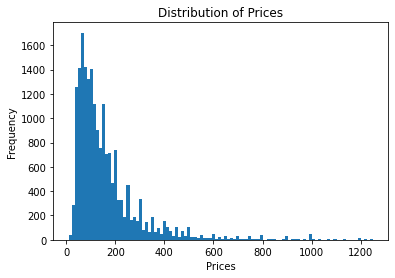

In [90]:
plt.hist(y_train, bins = 100)
plt.title('Distribution of Prices')
plt.xlabel('Prices')
plt.ylabel('Frequency');

In [91]:
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

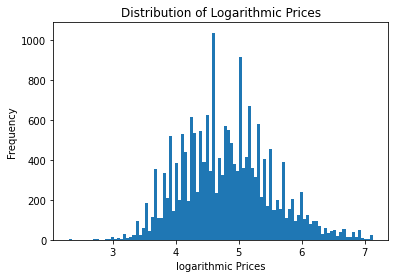

In [92]:
plt.hist(y_train_log, bins = 100)
plt.title('Distribution of Logarithmic Prices')
plt.xlabel('logarithmic Prices')
plt.ylabel('Frequency');

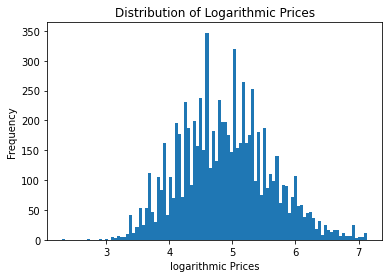

In [93]:
plt.hist(y_test_log, bins = 100)
plt.title('Distribution of Logarithmic Prices')
plt.xlabel('logarithmic Prices')
plt.ylabel('Frequency');

### Linear Regression

As presented after looking at the R squared values, The data did really well when it came to the training set, but did poorly when it came to the testing set.

In [94]:
lr = LinearRegression()
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)
lr.fit(X_train_ss, y_train_log)

LinearRegression()

In [95]:
print('LR Train R squared:', lr.score(X_train_ss, y_train_log))
print('LR Test R squared :', lr.score(X_test_ss, y_test_log))

LR Train R squared: 0.6850925240165854
LR Test R squared : -9.026536689189963e+21


A residual plot that looks at the initial values were looked at, seems that they are confined to 0-1000 area, with some outliers that can be seen.

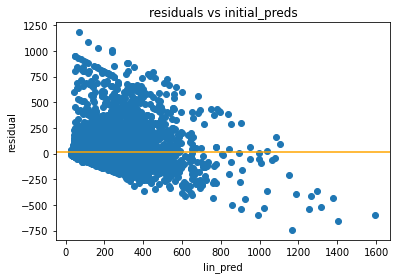

In [96]:
linear_train_preds = lr.predict(X_train_ss)
linear_val_preds = lr.predict(X_test_ss)
residuals = y_train - np.exp(linear_train_preds)
plt.title('residuals vs initial_preds')
plt.xlabel('lin_pred')
plt.ylabel('residual')
plt.scatter(np.exp(linear_train_preds), residuals);
plt.axhline(residuals.mean(), color = 'orange');

### Lasso Regularization

In [97]:
lasso_pipe = Pipeline([
    ('ss', StandardScaler()),
    ('model', Lasso())
])
lasso_params = [
    {
        'model__alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]
    }
]

lasso_gs = GridSearchCV(lasso_pipe, param_grid = lasso_params,verbose = 0, n_jobs = -1)
lasso_gs.fit(X_train, y_train_log)

GridSearchCV(estimator=Pipeline(steps=[('ss', StandardScaler()),
                                       ('model', Lasso())]),
             n_jobs=-1,
             param_grid=[{'model__alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                           10000, 100000]}])

In [98]:
lasso_train_preds = lasso_gs.predict(X_train)
lasso_val_preds = lasso_gs.predict(X_test)
actual_values = y_test
print(lasso_gs.best_params_)
print(lasso_gs.best_score_)

{'model__alpha': 0.01}
0.6324802989104059


When looking at lasso, the train and test scores did well at around 0.65, there is no overfitting in the data from what is seen.

In [99]:
print('Lasso Train R squared:', lasso_gs.score(X_train, y_train_log))
print('Lasso Test R squared :', lasso_gs.score(X_test, y_test_log))

Lasso Train R squared: 0.6527718673744485
Lasso Test R squared : 0.6524697096086894


A Predicted vs actual plot was made to look at how lasso regression did and the results are pretty good. 

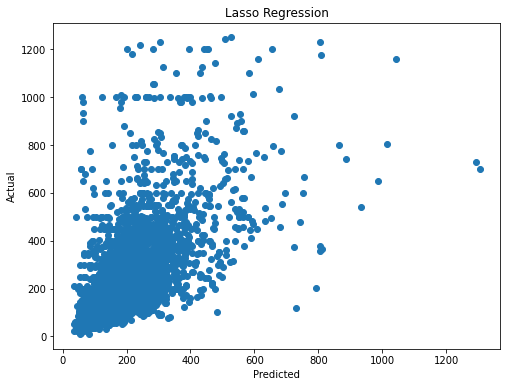

In [100]:
plt.figure(figsize=(8,6))
plt.scatter(np.exp(lasso_val_preds), actual_values)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Lasso Regression');

### Ridge Regularization

In [101]:
ridge_pipe = Pipeline([
    ('ss', StandardScaler()),
    ('model', Ridge())
])
ridge_params = [
    {
        'model__alpha': np.logspace(0, 5, 100, 1000, 10000)
    }
]

ridge_gs = GridSearchCV(ridge_pipe, param_grid = ridge_params,verbose = 0, n_jobs = -1)
ridge_gs.fit(X_train, y_train_log)

GridSearchCV(estimator=Pipeline(steps=[('ss', StandardScaler()),
                                       ('model', Ridge())]),
             n_jobs=-1,
             param_grid=[{'model__alpha': array([1.00000000e+00, 1.59228279e+00, 2.53536449e+00, 4.03701726e+00,
       6.42807312e+00, 1.02353102e+01, 1.62975083e+01, 2.59502421e+01,
       4.13201240e+01, 6.57933225e+01, 1.04761575e+02, 1.66810054e+02,
       2.65608778e+02, 4.22924287e+02, 6.73415066e+...
       2.25701972e+15, 3.59381366e+15, 5.72236766e+15, 9.11162756e+15,
       1.45082878e+16, 2.31012970e+16, 3.67837977e+16, 5.85702082e+16,
       9.32603347e+16, 1.48496826e+17, 2.36448941e+17, 3.76493581e+17,
       5.99484250e+17, 9.54548457e+17, 1.51991108e+18, 2.42012826e+18,
       3.85352859e+18, 6.13590727e+18, 9.77009957e+18, 1.55567614e+19,
       2.47707636e+19, 3.94420606e+19, 6.28029144e+19, 1.00000000e+20])}])

In [102]:
ridge_train_preds = ridge_gs.predict(X_train)
ridge_val_preds = ridge_gs.predict(X_test)
actual_values = y_test
print(ridge_gs.best_params_)
print(ridge_gs.best_score_)

{'model__alpha': 17475.28400007683}
0.5187110769031825


Ridge was performed in which the R squared values were 0.62 in which there no overfit of the data

In [103]:
print('Ridge Train R squared:', ridge_gs.score(X_train, y_train_log))
print('Ridge Validation R squared:', ridge_gs.score(X_test, y_test_log))


Ridge Train R squared: 0.6282401743267707
Ridge Validation R squared: 0.630005613721389


Plot was made to compare the actual vs the predicted values

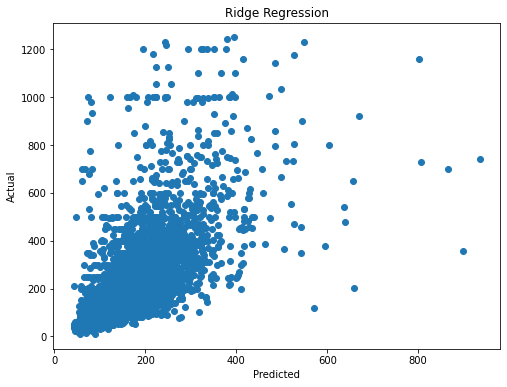

In [104]:
plt.figure(figsize=(8,6))
plt.scatter(np.exp(ridge_val_preds), actual_values)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Ridge Regression');

### Bagging Regressor

In [11]:
bag_pipe = Pipeline([
    ('bag', BaggingRegressor(random_state = 13))
])

bag_params = {
    'bag__n_estimators': [11,13,15],
    'bag__max_samples': [0.25, 0.50, 0.75, 0.80],
    'bag__max_features': [0.25, 0.50,0.65, 0.75, 0.85],
}

bag_gs = GridSearchCV(bag_pipe, param_grid = bag_params)

bag_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('bag',
                                        BaggingRegressor(random_state=13))]),
             param_grid={'bag__max_features': [0.25, 0.5, 0.65, 0.75, 0.85],
                         'bag__max_samples': [0.25, 0.5, 0.75, 0.8],
                         'bag__n_estimators': [11, 13, 15]})

In [12]:
bag_train_preds = bag_gs.predict(X_train)
bag_val_preds = bag_gs.predict(X_test)
bag_gs.best_params_

{'bag__max_features': 0.85, 'bag__max_samples': 0.8, 'bag__n_estimators': 15}

After looking at the R squared values, the values are overfit from the results that were obtained

In [13]:
print('Bag Train R squared:', bag_gs.score(X_train, y_train))
print('Bag Validation R squared:', bag_gs.score(X_test, y_test))


Bag Train R squared: 0.8621611926732684
Bag Validation R squared: 0.4465090568928304


### Random Forest

In [14]:
rf_pipe = Pipeline([
    ('rf', RandomForestRegressor(random_state = 13))
])

rf_params = {
    'rf__n_estimators': [50, 75, 100, 150, 200],
    'rf__max_depth': [5, 7, 9, 15],
    'rf__max_features': ['sqrt', 1],
    'rf__max_samples': [0.25,0.50, 0.75, 0.95],
}

rf_gs = GridSearchCV(rf_pipe, param_grid = rf_params)

rf_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('rf',
                                        RandomForestRegressor(random_state=13))]),
             param_grid={'rf__max_depth': [5, 7, 9, 15],
                         'rf__max_features': ['sqrt', 1],
                         'rf__max_samples': [0.25, 0.5, 0.75, 0.95],
                         'rf__n_estimators': [50, 75, 100, 150, 200]})

In [15]:
rf_train_preds = rf_gs.predict(X_train)
rf_val_preds = rf_gs.predict(X_test)
rf_gs.best_params_

{'rf__max_depth': 15,
 'rf__max_features': 'sqrt',
 'rf__max_samples': 0.95,
 'rf__n_estimators': 200}

The R squared values for the random forest seem to be overfit as well when compared to the linear regression.

In [16]:
print('Random Forest Train R squared:', rf_gs.score(X_train, y_train))
print('Random Fores Validation R squared:', rf_gs.score(X_test, y_test))



Random Forest Train R squared: 0.7223479707174321
Random Fores Validation R squared: 0.4458901711867651


Neural Network

Two Neural Networks were performed and the R squared values were compared to the other models that were made. 

In [39]:
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [40]:

nn = Sequential()
nn.add(Dense(256, input_shape=(X_train.shape[1],), activation='relu'))
nn.add(Dense(128, activation='relu'))
nn.add(Dense(64, activation='relu'))
nn.add(Dense(31, activation='relu'))
nn.add(Dense(16, activation='relu'))
nn.add(Dense(1, None))

# Compiling the model
nn.compile(loss='mean_squared_error',
            optimizer='adam',
            metrics=['mean_absolute_error'])

# Model summary
print(nn.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 256)               80384     
                                                                 
 dense_15 (Dense)            (None, 128)               32896     
                                                                 
 dense_16 (Dense)            (None, 64)                8256      
                                                                 
 dense_17 (Dense)            (None, 31)                2015      
                                                                 
 dense_18 (Dense)            (None, 16)                512       
                                                                 
 dense_19 (Dense)            (None, 1)                 17        
                                                                 
Total params: 124,080
Trainable params: 124,080
Non-tr

In [41]:
nn_history = nn.fit(X_train,
                  y_train,
                  epochs=100,
                  batch_size=256,
                  validation_split = 0.2)


Epoch 1/100
99/99 [==============================] - 2s 14ms/step - loss: 397157335040.0000 - mean_absolute_error: 4272.9365 - val_loss: 31963.4570 - val_mean_absolute_error: 117.3464
Epoch 2/100
99/99 [==============================] - 1s 11ms/step - loss: 1569231994880.0000 - mean_absolute_error: 8079.7075 - val_loss: 26393.9785 - val_mean_absolute_error: 108.5772
Epoch 3/100
99/99 [==============================] - 1s 11ms/step - loss: 3973448448.0000 - mean_absolute_error: 557.6147 - val_loss: 20443.2070 - val_mean_absolute_error: 96.6926
Epoch 4/100
99/99 [==============================] - 1s 11ms/step - loss: 796890955776.0000 - mean_absolute_error: 5798.1738 - val_loss: 31394.5996 - val_mean_absolute_error: 114.2348
Epoch 5/100
99/99 [==============================] - 1s 10ms/step - loss: 1520614244352.0000 - mean_absolute_error: 8018.4468 - val_loss: 21474.8945 - val_mean_absolute_error: 103.0794
Epoch 6/100
99/99 [==============================] - 1s 12ms/step - loss: 18712485

In [42]:
nn_history.history.keys()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])

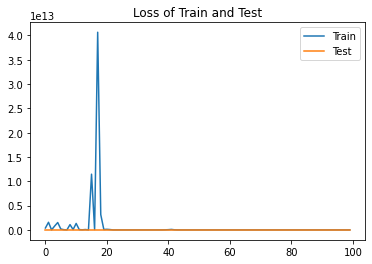

In [53]:
plt.plot(nn_history.history['loss'], label = 'Train')
plt.plot(nn_history.history['val_loss'], label = 'Test')
plt.title('Loss of Train and Test')
plt.legend();

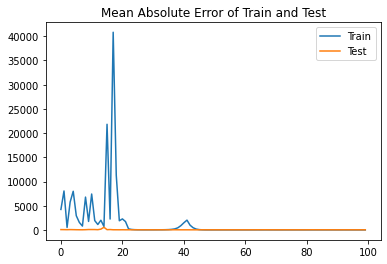

In [52]:
plt.plot(nn_history.history['mean_absolute_error'], label = 'Train')
plt.plot(nn_history.history['val_mean_absolute_error'], label = 'Test')
plt.title('Mean Absolute Error of Train and Test')
plt.legend();

In [63]:
y_train_pred = nn.predict(X_train)
y_test_pred = nn.predict(X_test)
print(f' Neural Network Train score:',r2_score(y_train, y_train_pred))
print(f' Neural Network 2 Test score:',r2_score(y_test, y_test_pred))

247/247 [==============================] - 1s 3ms/step
 Neural Network Train score: 0.6400899681454876
 Neural Network 2 Test score: 0.580541997683439


### 2nd Neural Network

In [46]:

nn2 = Sequential()
nn2.add(Dense(256, input_shape=(X_train.shape[1],), activation='relu'))
nn2.add(Dense(256, activation='relu'))
nn2.add(Dense(256, activation='relu'))
nn2.add(Dense(128, activation = 'relu'))
nn2.add(Dense(64, activation = 'relu'))
nn2.add(Dense(32, activation = 'relu'))
nn2.add(Dense(16, activation = 'relu'))
nn2.add(Dense(1, None))

# Compiling the model
nn2.compile(loss='mean_squared_error',
            optimizer='adam',
            metrics=['mean_absolute_error'])

# Model summary
print(nn2.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 256)               80384     
                                                                 
 dense_21 (Dense)            (None, 256)               65792     
                                                                 
 dense_22 (Dense)            (None, 256)               65792     
                                                                 
 dense_23 (Dense)            (None, 128)               32896     
                                                                 
 dense_24 (Dense)            (None, 64)                8256      
                                                                 
 dense_25 (Dense)            (None, 32)                2080      
                                                                 
 dense_26 (Dense)            (None, 16)               

In [47]:
nn2_history = nn2.fit(X_train,
                  y_train,
                  epochs=200,
                  batch_size=256,
                  validation_split = 0.2)

Epoch 1/200
99/99 [==============================] - 3s 21ms/step - loss: 2675801325568.0000 - mean_absolute_error: 10608.9785 - val_loss: 34013.7617 - val_mean_absolute_error: 126.4102
Epoch 2/200
99/99 [==============================] - 2s 24ms/step - loss: 488016052224.0000 - mean_absolute_error: 4589.7344 - val_loss: 30248.5742 - val_mean_absolute_error: 114.6581
Epoch 3/200
99/99 [==============================] - 3s 34ms/step - loss: 287710445568.0000 - mean_absolute_error: 3540.0881 - val_loss: 27152.5430 - val_mean_absolute_error: 110.6418
Epoch 4/200
99/99 [==============================] - 3s 34ms/step - loss: 2132273528832.0000 - mean_absolute_error: 9396.9316 - val_loss: 25814.2715 - val_mean_absolute_error: 102.4625
Epoch 5/200
99/99 [==============================] - 2s 24ms/step - loss: 215862771712.0000 - mean_absolute_error: 3129.4419 - val_loss: 21893.5312 - val_mean_absolute_error: 108.0676
Epoch 6/200
99/99 [==============================] - 2s 17ms/step - loss: 406

In [48]:
nn2_history.history.keys()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])

The Second Neural Network came with the values of 0.66 for the train R squared and 0.59 for the test R squared.

In [61]:
y_train_pred_2 = nn2.predict(X_train)
y_test_pred_2 = nn2.predict(X_test)
print(f' Neural Network 2 Train score:', {r2_score(y_train, y_train_pred_2)})
print(f' Neural Network 2 Test score:',{r2_score(y_test, y_test_pred_2)})

247/247 [==============================] - 1s 3ms/step
 Neural Network 2 Train score: {0.6675625308804056}
 Neural Network 2 Test score: {0.5972413230629472}


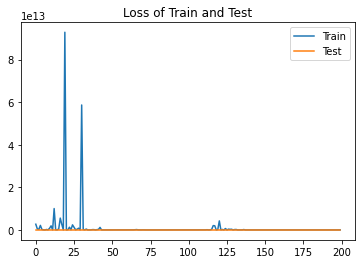

In [56]:
plt.plot(nn2_history.history['loss'], label = 'Train')
plt.plot(nn2_history.history['val_loss'], label = 'Test')
plt.title('Loss of Train and Test')
plt.legend();

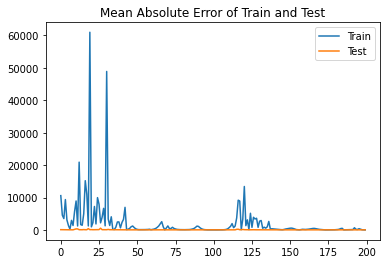

In [55]:
plt.plot(nn2_history.history['mean_absolute_error'], label = 'Train')
plt.plot(nn2_history.history['val_mean_absolute_error'], label = 'Test')
plt.title('Mean Absolute Error of Train and Test')
plt.legend();

### Conclusion 
Multiple models were looked at including Linear Regression, Lasso Regularization, Ridge Regularization, Bagging Regressors, Random Forest Regressor, and two Deep learning Neural Networks. The models were made to predict prices for AirBnB properties with the features that were chosen after data cleaning. After conducting the Linear Regression, Lasso was conducted in which the natural log of y_train and y_test were used to normalize the distribution. The R squared value for the training score was 0.65 and the testing score was 0.65. The best parameter for Lasso had an alpha of 0.01 with a best score of 0.63. This model was not overfit and did the best compared to the other models. 